In [1]:
import torch
import clip
from PIL import Image

In [ ]:
from pinter_crawler import PinterestScraper, PinterestConfig

configs = PinterestConfig(search_keywords="kakao", # Search word
                          file_lengths=200,     # total number of images to download (default = "100")
                          image_quality="orig", # image quality (default = "orig")
                          bookmarks="")         # next page data (default= "")


PinterestScraper(configs).download_images()     # download images directly
print(PinterestScraper(configs).get_urls())     # just bring image links


In [18]:
# clip.available_models()

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/16", device=device)

In [3]:
import os, glob

In [4]:
# photo_list = os.listdir('./photos/kakao/')
photo_list = glob.glob('./photos/kakao/*.jpg')

In [5]:
img_features = []
for photo in photo_list:
    image = preprocess(Image.open(photo)).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image)
        img_features.append(
            {
                'img_path': photo,
                'embeddings': image_features.cpu().numpy(),
            }
        )

In [6]:
# kakao 캐릭터 이미지 검색?

In [7]:
import faiss
import numpy as np

In [8]:
img_embs = [img['embeddings'].squeeze() for img in img_features]
img_embs = np.array(img_embs).astype('float32')

In [9]:
d = 512					# dimension of vector

np.random.seed(1234)             # make reproducible

# img_vectors = np.random.random((len(img_embs), d)).astype('float32')

In [10]:
Index = faiss.IndexFlatL2(d)
print(Index.is_trained)		# True
Index.add(img_embs)	# add 연산
print(Index.ntotal)		# 10000

True
176


In [11]:
text = clip.tokenize(["animal character"]).to(device)
text_features = model.encode_text(text)

In [12]:
txt_emb = text_features.cpu().detach().numpy().astype('float32')

In [13]:
k = 5
distances, indexes = Index.search(txt_emb, k)

In [14]:
indexes = indexes.squeeze()

In [15]:
top_imgs = [img_features[idx]['img_path'] for idx in indexes]

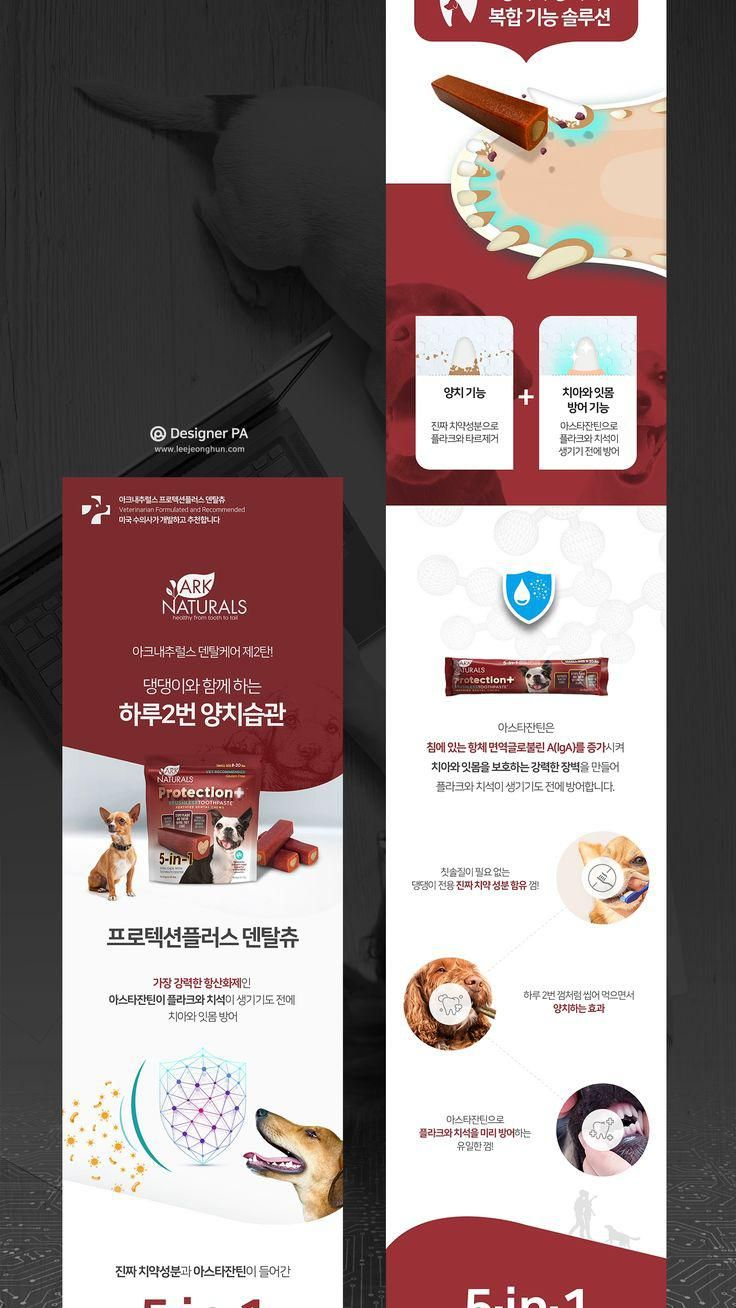

In [17]:
Image.open(top_imgs[1])